In [1]:
import sys
print(sys.version)
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipyvolume as ipv
%matplotlib inline

from tyssue import Sheet, SheetGeometry, Monolayer, config, MonolayerGeometry
from tyssue.solvers.sheet_vertex_solver import Solver
from tyssue.draw import sheet_view
from tyssue.io import hdf5

from tyssue.solvers import QSSolver
from tyssue.dynamics import model_factory, effectors

from tyssue import collisions
from tyssue.collisions.solvers import (solve_sheet_collisions,
                                       solve_monolayer_collisions)
from tyssue import version
print('tyssue version: ', version.full_version)

from tyssue import config

from tyssue import stores

3.7.1 | packaged by conda-forge | (default, Nov 13 2018, 18:15:35) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
tyssue version:  0.3.1.dev0+Unknown


## Collision avoidance

Inspired by this paper:

Liu, J.-D., Ko, M.-T., & Chang, R.-C. (1998). _A simple self-collision avoidance for cloth animation_. Computers & Graphics, 22(1), 117–128. [DOI](https://doi.org/doi:10.1016/s0097-8493(97)00087-3)


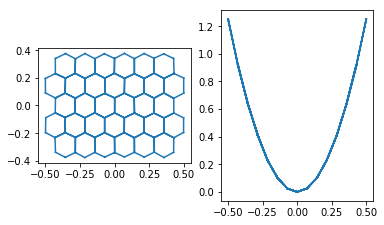

In [2]:

sheet = Sheet('crossed', hdf5.load_datasets(Path(stores.stores_dir)/"sheet6x5.hf5"))

sheet.vert_df.z = 5 * sheet.vert_df.x**2
sheet.vert_df[sheet.coords] += np.random.normal(scale=0.001, size=(sheet.Nv, 3))
    

SheetGeometry.update_all(sheet)


fig, axes = plt.subplots(1, 2, sharex=True)
fig, ax = sheet_view(sheet, coords=['x', 'y'], mode='quick', ax=axes[0])
fig, ax = sheet_view(sheet, coords=['x', 'z'], mode='quick', ax=axes[1])



In [3]:
position_buffer = sheet.vert_df[sheet.coords].copy()

sheet.vert_df.x -=  35*(sheet.vert_df.x/2)**3
SheetGeometry.update_all(sheet)

ipv.clear()
fig, mesh = sheet_view(sheet, mode='3D')
fig

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

In [4]:
sheet.settings['shyness'] = 0.1
solve_sheet_collisions(sheet, position_buffer)
SheetGeometry.update_all(sheet)
ipv.clear()
sheet_view(sheet, mode='3D')
ipv.squarelim()
ipv.show()

In [5]:
datasets =  hdf5.load_datasets(Path(stores.stores_dir)/'small_ellipsoid.hf5',
                               data_names=['vert', 'edge', 'face', 'cell'])

ellipso = Monolayer(
    'ellipso', datasets,
    config.geometry.bulk_spec())


In [6]:
ipv.clear()
sheet_view(ellipso, mode='3D')
ipv.squarelim()
ipv.show()

In [7]:
position_buffer = ellipso.vert_df[ellipso.coords]
solve_monolayer_collisions(ellipso, position_buffer)

In [8]:
ellipso